# Nonlinear models

Fall 2022: Peter Ralph

https://uodsci.github.io/dsci345

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15, 8)
import numpy as np
import pandas as pd
from dsci345 import pretty

rng = np.random.default_rng()

$$\renewcommand{\P}{\mathbb{P}} \newcommand{\E}{\mathbb{E}} \newcommand{\var}{\text{var}} \newcommand{\sd}{\text{sd}} \newcommand{\cov}{\text{cov}} \newcommand{\cor}{\text{cor}}$$
This is here so we can use `\P` and `\E` and `\var` and `\cov` and `\cor` and `\sd` in LaTeX below.

# When it's not straight lines, part 1

We've spent a fair bit of time on fitting *linear* relationships.
What about when they aren't linear?
For instance, what if the data look like this?

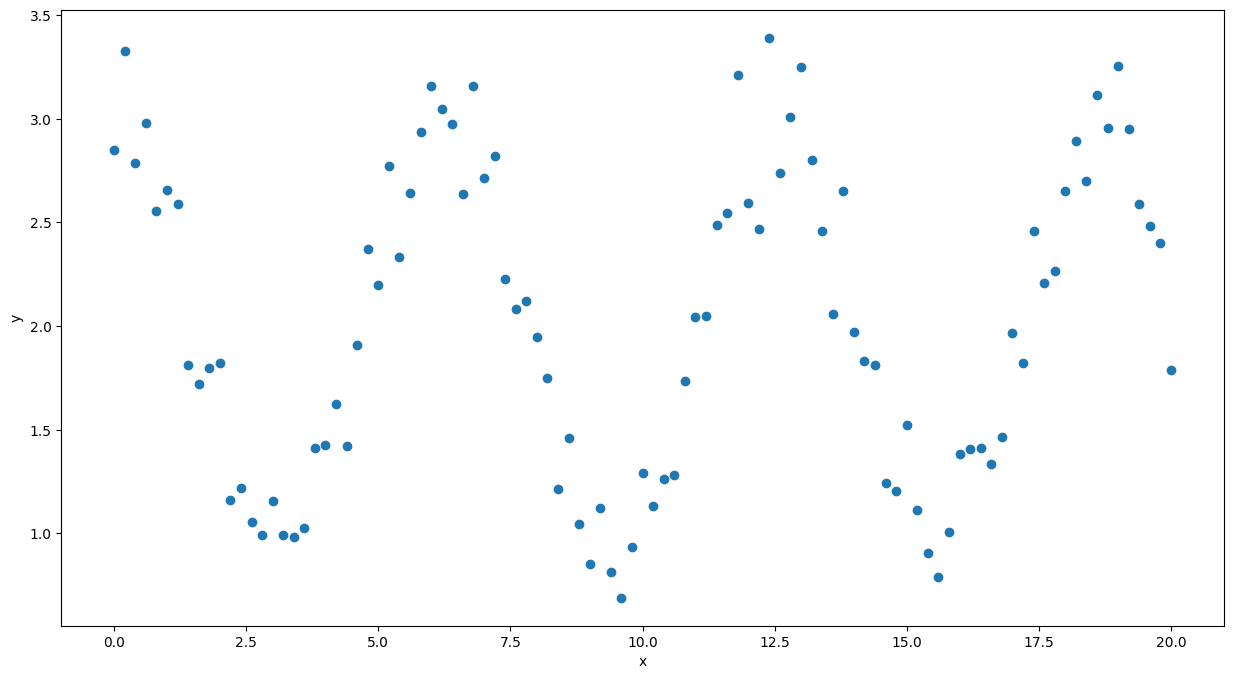

In [2]:
x = np.linspace(0, 20, 101)
y = 2 + np.cos(x) + rng.normal(scale=0.2, size=101)
plt.scatter(x, y); plt.xlabel("x"); plt.ylabel("y");

*Solution:* the data are of this form:
$$ y_i = a + b \cos(x_i) + \epsilon_i $$
... which *is* linear, in $\cos(x)$!

# Example: sines and cosines

Suppose we have measured the intensities of radio waves received from a nearby star.
The measured intensity at time $t_i$ is $y_i$, for $1 \le i \le n$.
We would like to fit a periodic form to the data, like:
$$
    y(t) = \sum_{j=0}^{k} \alpha_j \cos(\pi t / 2^j) + \beta_j \sin(\pi t / 2^j)  + \epsilon ,
$$
where $\epsilon$ is mean-zero noise.
How can we do this?

We can in fact transform this into a problem of fitting a linear model:
let $y = (y_1, \ldots, y_n)$
and define the matrix $X$ to be
$$
X =
\begin{bmatrix}
    \cos(\pi t_1)  & \sin(\pi t_1) & \cos(\pi t_1 / 2)  & \sin(\pi t_1 / 2) & \cdots & \cos(\pi t_1 / 2^k)  & \sin(\pi t_1 / 2^k) \\
    \cos(\pi t_2)  & \sin(\pi t_2) & \cos(\pi t_2 / 2)  & \sin(\pi t_2 / 2) & \cdots & \cos(\pi t_2 / 2^k)  & \sin(\pi t_2 / 2^k) \\
    \vdots & \vdots & & & & \vdots & \vdots \\
    \cos(\pi t_n)  & \sin(\pi t_n) & \cos(\pi t_n / 2)  & \sin(\pi t_n / 2) & \cdots & \cos(\pi t_n / 2^k)  & \sin(\pi t_2 / 2^k) 
\end{bmatrix}.
$$
Now, if we define $a = (\alpha_0, \beta_0, \alpha_1, \beta_1, \ldots, \alpha_k, \beta_k)$,
then our model is
$$ y = X a + \epsilon , $$
so we can solve the problem using the tools above.

Let's try it out!
First, we'll simulate some data:

In [3]:
n = 150
true_coefs = [(1, 0), (3.2, 2.5), (0, 0), (10, 0)]
tvec = np.sort(rng.uniform(low=0, high=15, size=n))
mean_yvec = np.zeros(n)
for j, (alpha, beta) in enumerate(true_coefs):
    mean_yvec += alpha * np.cos(np.pi * tvec / 2**j) + beta * np.sin(np.pi * tvec / 2**j)
yvec = mean_yvec + rng.normal(scale=2.0, size=n)

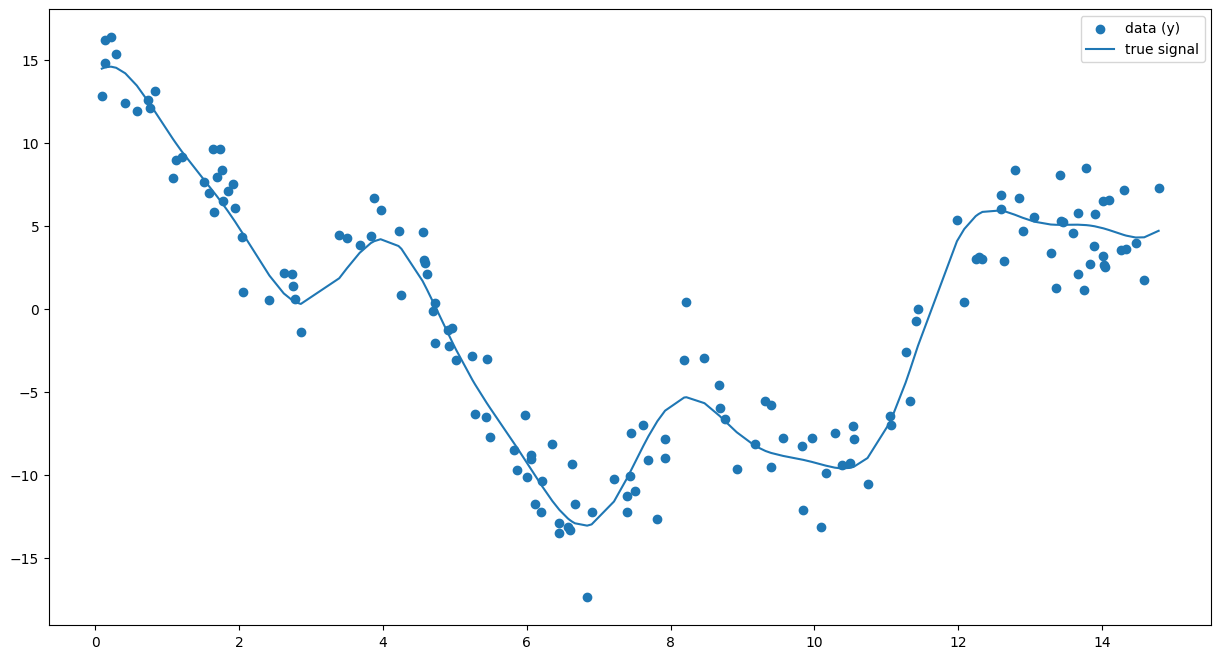

In [4]:
fig, ax = plt.subplots()
ax.scatter(tvec, yvec, label="data (y)")
ax.plot(tvec, mean_yvec, label="true signal")
ax.legend();

In [5]:
k = 4
X = np.array([
    [np.cos(np.pi * t / 2 ** j) for j in range(k+1)]
    + [np.sin(np.pi * t / 2 ** j) for j in range(k+1)]
    for t in tvec
])
a_hat = np.linalg.solve(np.matmul(X.T, X), (X.T).dot(yvec))
y_hat = X.dot(a_hat)

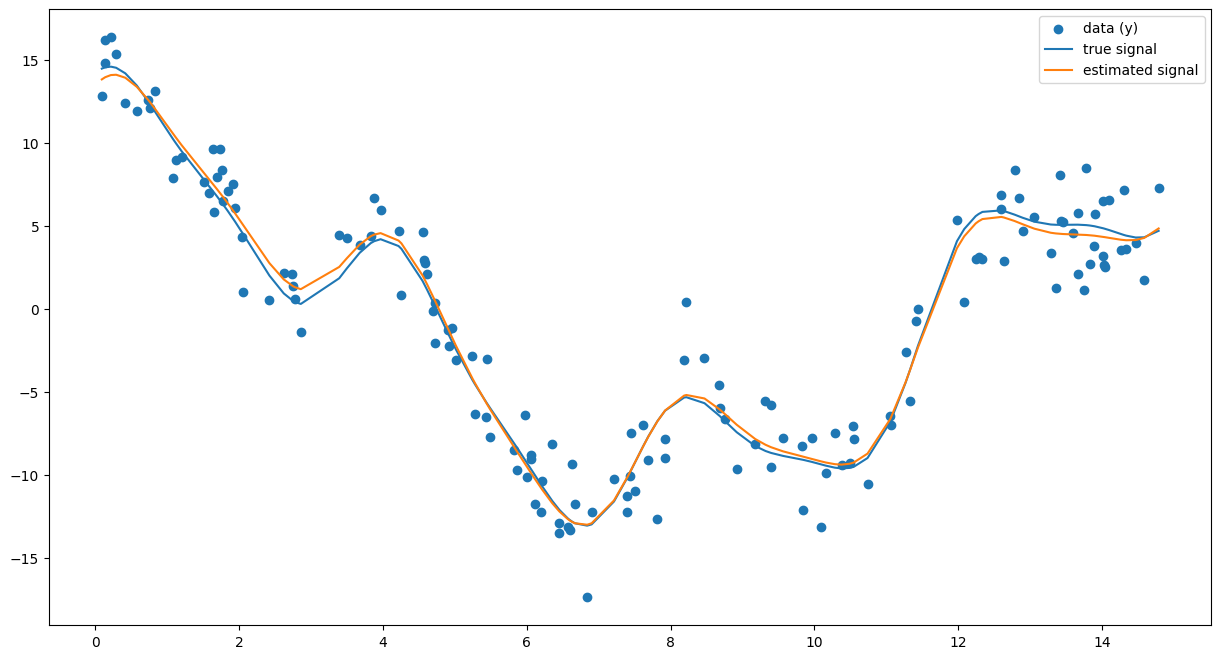

In [6]:
fig, ax = plt.subplots()
ax.scatter(tvec, yvec, label="data (y)")
ax.plot(tvec, mean_yvec, label="true signal")
ax.plot(tvec, y_hat, label="estimated signal")
ax.legend();

# When it's not straight lines, part 2

Okay, what if the data look like this?

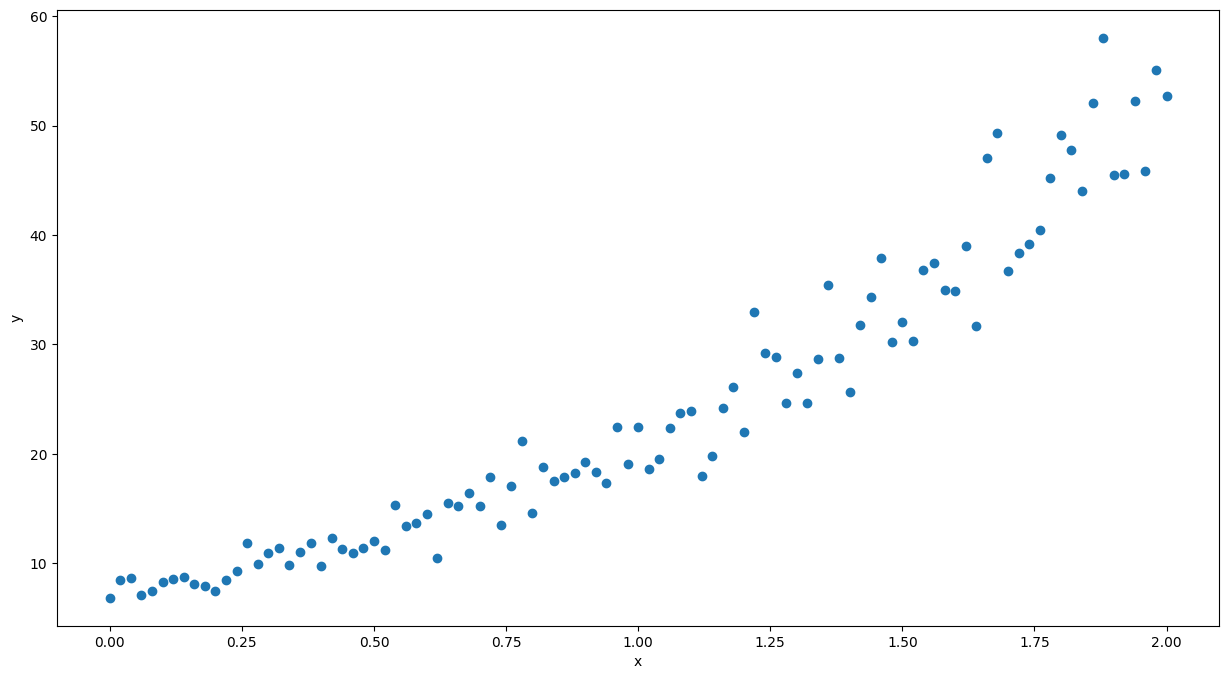

In [7]:
x = np.linspace(0, 2, 101)
y = np.exp(2 + x + rng.normal(scale=0.1, size=101))
plt.scatter(x, y); plt.xlabel("x"); plt.ylabel("y");

Here the model is
$$ y_i = \exp(a + b x_i + \epsilon_i) , $$
and so
$$ \log(y_i) = a + b x_i + \epsilon_i . $$

## Exercise:

Suppose the output of viruses $x$ hours after infection is
$$ y = \exp(a + bx + \epsilon), $$
where $\epsilon \sim \text{Normal}(0, \sigma)$.
Estimate $a$, $b$, and $\sigma$ using the following data:

In [8]:
x = np.array([28., 67.,  7., 47., 15., 65., 29., 21., 49., 41., 56.,  1., 32.,
        25., 49., 27., 40., 54., 22.,  9.])
y = np.array([ 32., 119.,   9.,  90.,  18., 107.,  23.,  14.,  56.,  40.,  85.,
         8.,  42.,  19.,  48.,  30.,  38., 110.,  27.,   8.])

# Nonlinear, for reals

Now suppose the output of viruses $x$ hours after infection is
$$ y = e^{a + bx} + \epsilon , $$
where $\epsilon \sim \text{Normal}(0, \sigma)$.

Can we solve this with a standard linear model?

**No.**

Solution: straightforward minimization,
with [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html),
for instance.

In [9]:
from scipy.optimize import least_squares
ls_fit = least_squares(
    lambda u: y - np.exp(u[0] + u[1] * x),
    x0=(1, 1),
)
ls_fit

 active_mask: array([0., 0.])
        cost: 1457.0070960833966
         fun: array([  2.46155603,  -6.00947749,  -4.58349943,  30.34696886,
        -0.26147439,  -9.0945674 ,  -7.65159898,  -8.79969123,
        -8.23379164,  -7.7792567 ,   1.78105478,  -2.87974063,
         7.75085781,  -7.43571434, -16.23379164,   1.53428528,
        -8.04408723,  32.71572013,   3.34110337,  -6.62657732])
        grad: array([-1.20900595e-05,  4.68987075e-01])
         jac: array([[  -29.53844419,  -827.07660389],
       [ -125.00948119, -8375.63917255],
       [  -13.58349967,   -95.08450091],
       [  -59.65303135, -2803.69344521],
       [  -18.2614749 ,  -273.92214632],
       [ -116.09457072, -7546.15053463],
       [  -30.65159917,  -888.89656258],
       [  -22.79969168,  -478.79359078],
       [  -64.23379185, -3147.4569397 ],
       [  -47.77925755, -1958.95012331],
       [  -83.21894776, -4660.26287651],
       [  -10.87974079,   -10.87974072],
       [  -34.24914261, -1095.97281122],
    

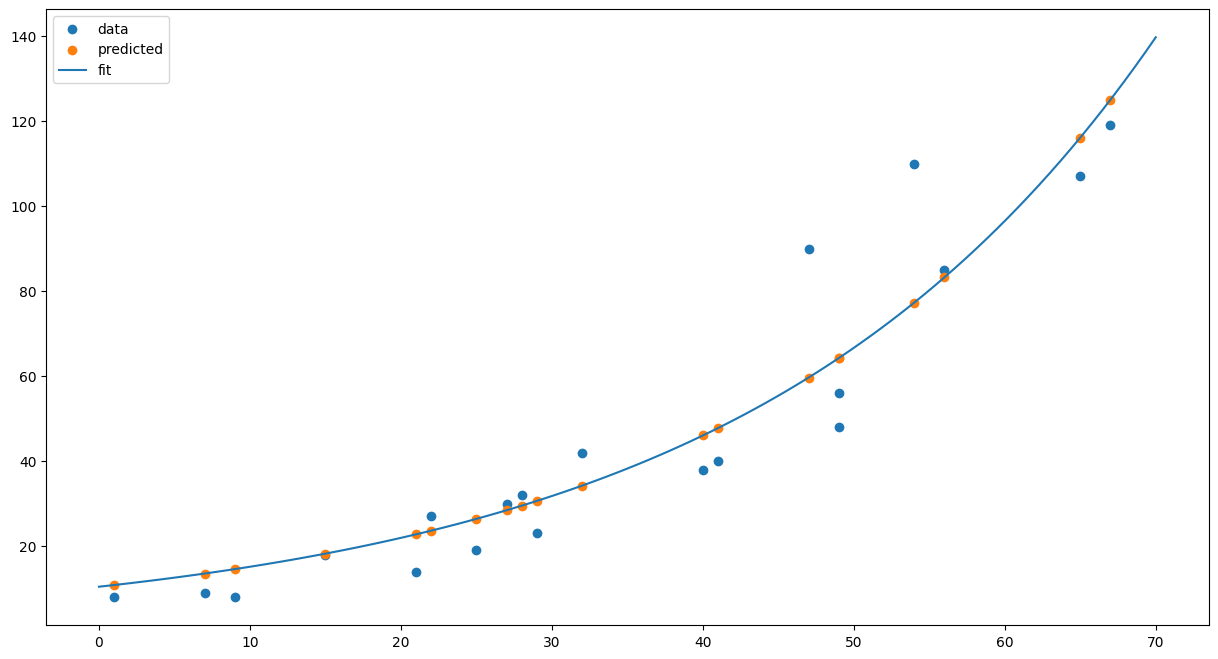

In [10]:
est_a, est_b = ls_fit['x']
y_hat = np.exp(est_a + est_b * x)
plt.scatter(x, y, label='data')
plt.scatter(x, y_hat, label='predicted')
xx = np.linspace(0, 70, 101)
plt.plot(xx, np.exp(est_a + est_b * xx), label='fit')
plt.legend();